In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [14]:
points = np.random.random(size=(100,2))*20
data = pd.read_csv('./cluster.csv')
points = data[["x", "y"]].to_numpy()
# points = np.array([[5, 3],[-1, 1],[1, -2],[-3, -2]])

In [15]:
def random_seed() -> tuple:
    '''
    Generate random seed with in the set point provided in the problem, the 
    seed is generated base on uniform distribution 

    Returns:
        uniformly random point
    '''

    return [np.random.uniform(points[:,0].min(), points[:,0].max()), 
            np.random.uniform(points[:,1].min(), points[:,1].max())]

In [18]:
k = 3

@dataclass
class Cluster:
    centroid: list[float]
    members: list[float, float]

clusters = [Cluster(centroid=random_seed(), members=[]) for _ in range(k)]

for i in range(10):

    for x,y in points:
        # distance to point
        distances = [(x-cluster.centroid[0])**2 + (y-cluster.centroid[1])**2 
                     for cluster in clusters]

        min_index = np.argmin(distances)
        clusters[min_index].members.append([x,y])

    for cluster in clusters:
        cluster.centroid = np.mean(cluster.members, axis=0) if cluster.members else random_seed()
        if i != 9:
            cluster.members=[]

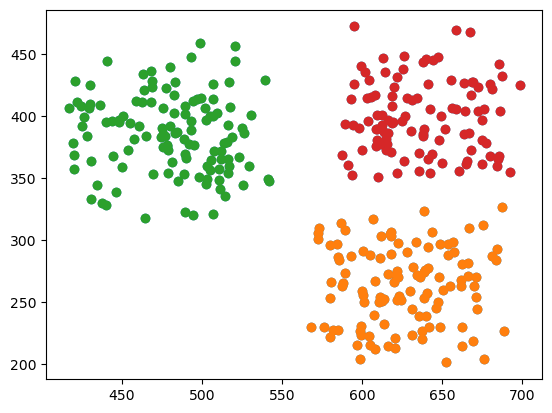

In [19]:
plt.scatter(points[:,0], points[:,1])

for cluster in clusters:
    if cluster.members:
        plt.scatter(np.array(cluster.members)[:,0], 
                    np.array(cluster.members)[:,1])
